In [114]:
import pandas as pd
import numpy as np
import os 
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimestampedGeoJson

In [12]:
os.chdir('C:\\Users\\home\\Desktop\\Capstone!!')

In [41]:
df = pd.read_csv("ais_east_asia_oct2024_20231001.csv")

In [72]:
df[df['mmsi']==525119060][['position','longitude', 'latitude']]

,position,longitude,latitude
1,POINT (108.385 -5.733333333333333),108.3850,-5.7333
2,POINT (108.37333333333333 -5.733333333333333),108.3733,-5.7333
57,POINT (108.27 -5.7316666666666665),108.2700,-5.7317
58,POINT (108.26 -5.7316666666666665),108.2600,-5.7317
62,POINT (108.25 -5.7316666666666665),108.2500,-5.7317
...,...,...,...
446712,POINT (107.67666666666666 -5.733333333333333),107.6767,-5.7333
446763,POINT (107.61333333333333 -5.73),107.6133,-5.7300
446772,POINT (107.53666666666666 -5.7316666666666665),107.5367,-5.7317
446775,POINT (107.52666666666667 -5.7316666666666665),107.5267,-5.7317


In [58]:
df2 = df[df['mmsi']==525119060]

C:\Users\home\AppData\Local\Temp/ipykernel_9440/3694536048.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

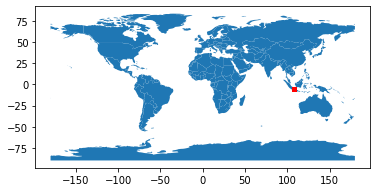

In [65]:
geometry = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]
gdf = GeoDataFrame(df2, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot()
gdf.plot(ax=ax, marker='o', color='red', markersize=15)


- every FID value is unique 
- every mmsi value is not unique (vessel location changes with time thus the mmsi is repeated)  
- no entries for:
    - eeid (empty series)
    - vessel_type_main
    - vessel_type_sub
    - vessel_type_cargo has 888709/1000000 rows missing
- ts_pos_utc and ts_static_utc are the exact same
- dt_pos_utc and dt_static_utc are seen as the exact same
    - ts_pos_utc and dt_pos_utc are not seen as the same
- position is a combination of longitude and latitude
    - POINT (longitude, latitude)

In [51]:
df.head(15)

,FID,mmsi,source_id,imo,vessel_name,callsign,vessel_type,vessel_type_code,vessel_type_cargo,vessel_class,...,source,ts_pos_utc,ts_static_utc,dt_pos_utc,dt_static_utc,vessel_type_main,vessel_type_sub,message_type,eeid,dtg
0,d2829460be9da1506fca6bc2efc7d55a,538007482,153,9330707.0,HYUNDAI FORWARD,V7PX2,Cargo,70.0,NaN,A,...,S-AIS,20231001000127,20231001000127,2023-10-01 00:01:27,2023-10-01 00:01:27,NaN,NaN,1,NaN,2023-10-01T00:01:27
1,1111c6773adb4fe5581293217623e92e,525119060,153,8710168.0,MV.MANDRAGUNA,YCBF2,Cargo,70.0,NaN,A,...,S-AIS,20231001000250,20231001000250,2023-10-01 00:02:50,2023-10-01 00:02:50,NaN,NaN,27,NaN,2023-10-01T00:02:50
2,13191b14c9a9dc7f26098d3e3fe1f8f8,525119060,153,8710168.0,MV.MANDRAGUNA,YCBF2,Cargo,70.0,NaN,A,...,S-AIS,20231001000547,20231001000547,2023-10-01 00:05:47,2023-10-01 00:05:47,NaN,NaN,27,NaN,2023-10-01T00:05:47
3,010d1196faaccda9932cebe97b598fb7,525301135,153,9945253.0,LCT LAS AMIRINDO 7,YDMF2,Cargo,70.0,NaN,A,...,S-AIS,20231001000141,20231001000141,2023-10-01 00:01:41,2023-10-01 00:01:41,NaN,NaN,27,NaN,2023-10-01T00:01:41
4,fe7729b18f2fd7554b69692aa1f01559,525301135,153,9945253.0,LCT LAS AMIRINDO 7,YDMF2,Cargo,70.0,NaN,A,...,S-AIS,20231001000437,20231001000437,2023-10-01 00:04:37,2023-10-01 00:04:37,NaN,NaN,27,NaN,2023-10-01T00:04:37
5,ce6851300bcf3f6a0be550beccdb8545,525301135,153,9945253.0,LCT LAS AMIRINDO 7,YDMF2,Cargo,70.0,NaN,A,...,S-AIS,20231001001036,20231001001036,2023-10-01 00:10:36,2023-10-01 00:10:36,NaN,NaN,27,NaN,2023-10-01T00:10:36
6,413eb4afb45da1e70aaed8c77ab4491d,525114112,153,9914175.0,IDN WARSHIP-992,YDPE2,Medical Transport,58.0,NaN,A,...,S-AIS,20231001000720,20231001000720,2023-10-01 00:07:20,2023-10-01 00:07:20,NaN,NaN,27,NaN,2023-10-01T00:07:20
7,6e754d28492d772dc5b74387747ecf9f,525009266,139,9428633.0,OPS ANDRA,JZOZ,Other,90.0,NaN,A,...,V-AIS,20231001000009,20231001000009,2023-10-01 00:00:09,2023-10-01 00:00:09,NaN,NaN,3,NaN,2023-10-01T00:00:09
8,9c5bd313e993a056f3eaaf15c8ee679f,525005281,139,9524956.0,LOGINDO ENTERPRISE,JZTD,Other,99.0,No Additional Information,A,...,V-AIS,20231001000027,20231001000027,2023-10-01 00:00:27,2023-10-01 00:00:27,NaN,NaN,3,NaN,2023-10-01T00:00:27
9,36c186d48e89f3d41bbe1016ea42a6f5,525019627,66,9331957.0,MV CERDAS,POZM,Cargo,70.0,NaN,A,...,T-AIS,20231001000102,20231001000102,2023-10-01 00:01:02,2023-10-01 00:01:02,NaN,NaN,1,NaN,2023-10-01T00:01:02


In [73]:
df.isna().sum()

FID                        0
mmsi                       0
source_id                  0
imo                   319157
vessel_name                0
callsign              153162
vessel_type                0
vessel_type_code      131731
vessel_type_cargo     888709
vessel_class           95216
length                 65584
width                  65584
flag_country           44794
flag_code              13411
destination           275432
eta                        0
draught                    0
position                   0
longitude                  0
latitude                   0
sog                        0
cog                        0
rot                        0
heading                    0
nav_status                 0
nav_status_code            0
source                     0
ts_pos_utc                 0
ts_static_utc              0
dt_pos_utc                 0
dt_static_utc              0
vessel_type_main     1000000
vessel_type_sub      1000000
message_type               0
eeid          

In [78]:
df[df["vessel_name"].str.contains('buoy', case=False) == True] ## 1205 rows 

,FID,mmsi,source_id,imo,vessel_name,callsign,vessel_type,vessel_type_code,vessel_type_cargo,vessel_class,...,source,ts_pos_utc,ts_static_utc,dt_pos_utc,dt_static_utc,vessel_type_main,vessel_type_sub,message_type,eeid,dtg
18239,9a5d7045c5ea28d156357242064b9576,123038093,153,NaN,BUOY_64%,NaN,UNAVAILABLE,NaN,NaN,B,...,S-AIS,20231001015659,20231001015659,2023-10-01 01:56:59,2023-10-01 01:56:59,NaN,NaN,19,NaN,2023-10-01T01:56:59
20458,e9a9a61d371eaa53d8380ef463079256,123038053,139,NaN,BUOY_58%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001041034,20231001041034,2023-10-01 04:10:34,2023-10-01 04:10:34,NaN,NaN,19,NaN,2023-10-01T04:10:34
20459,adc8fa46e4f3d39f15572b115674fda3,123038093,139,NaN,BUOY_63%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001041459,20231001041459,2023-10-01 04:14:59,2023-10-01 04:14:59,NaN,NaN,19,NaN,2023-10-01T04:14:59
20465,9b3c8957072e443638f2cbbdecdf4e23,123038053,139,NaN,BUOY_58%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001042716,20231001042716,2023-10-01 04:27:16,2023-10-01 04:27:16,NaN,NaN,19,NaN,2023-10-01T04:27:16
20493,8deab1e58ee9b93db087a5f30e64b974,123038093,139,NaN,BUOY_62%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001050502,20231001050502,2023-10-01 05:05:02,2023-10-01 05:05:02,NaN,NaN,19,NaN,2023-10-01T05:05:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991707,bf620846823c9d1d13e2a06e05ae2f18,123050471,139,NaN,BUOY_55%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001234310,20231001234310,2023-10-01 23:43:10,2023-10-01 23:43:10,NaN,NaN,19,NaN,2023-10-01T23:43:10
992835,47ad20d13f4d866dabe3971e1c644ad2,123050351,139,NaN,AISBUOY SONETA_586%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001233931,20231001233931,2023-10-01 23:39:31,2023-10-01 23:39:31,NaN,NaN,19,NaN,2023-10-01T23:39:31
993371,927a681594caaa84c9e64e471f955ca7,123029330,139,NaN,AIS BUOY SJ339%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001235744,20231001235744,2023-10-01 23:57:44,2023-10-01 23:57:44,NaN,NaN,19,NaN,2023-10-01T23:57:44
993403,d8876e9e30e0752547ea8179a27c796c,123050389,139,NaN,AISBUOY BENTO_280%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001235905,20231001235905,2023-10-01 23:59:05,2023-10-01 23:59:05,NaN,NaN,19,NaN,2023-10-01T23:59:05


In [163]:
df[df["vessel_name"].str.contains('beacon', case=False) == True] ## 10126 rows 

,FID,mmsi,source_id,imo,vessel_name,callsign,vessel_type,vessel_type_code,vessel_type_cargo,vessel_class,...,source,ts_pos_utc,ts_static_utc,dt_pos_utc,dt_static_utc,vessel_type_main,vessel_type_sub,message_type,eeid,dtg
407211,c401f60f0da4737100726917c8d0c4aa,567568000,139,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,V-AIS,20231001002651,20231001002651,2023-10-01 00:26:51,2023-10-01 00:26:51,NaN,NaN,1,NaN,2023-10-01T00:26:51
407841,50ddd0fc8c8aa1ad7cd9750e6c80306f,567568000,153,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,S-AIS,20231001005109,20231001005109,2023-10-01 00:51:09,2023-10-01 00:51:09,NaN,NaN,27,NaN,2023-10-01T00:51:09
407847,6a19eebe508506d5a523aeaa45db8433,567568000,153,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,S-AIS,20231001005409,20231001005409,2023-10-01 00:54:09,2023-10-01 00:54:09,NaN,NaN,27,NaN,2023-10-01T00:54:09
407901,153ccd615ac52da1dd25ee5f90cc6f53,567568000,153,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,S-AIS,20231001010013,20231001010013,2023-10-01 01:00:13,2023-10-01 01:00:13,NaN,NaN,27,NaN,2023-10-01T01:00:13
408249,fbb617fef4ed180e1dace7532f22935c,567568000,153,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,S-AIS,20231001011208,20231001011208,2023-10-01 01:12:08,2023-10-01 01:12:08,NaN,NaN,27,NaN,2023-10-01T01:12:08
480654,a425260698f8cff5f57efeff4b93765d,567568000,139,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,V-AIS,20231001002752,20231001002752,2023-10-01 00:27:52,2023-10-01 00:27:52,NaN,NaN,1,NaN,2023-10-01T00:27:52
481062,e18fd37c777bed90f1e58709ad2804a1,567568000,153,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,S-AIS,20231001004211,20231001004211,2023-10-01 00:42:11,2023-10-01 00:42:11,NaN,NaN,27,NaN,2023-10-01T00:42:11
481702,f933ef81bf3c05b37508f6e25815e4bc,567568000,153,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,S-AIS,20231001010306,20231001010306,2023-10-01 01:03:06,2023-10-01 01:03:06,NaN,NaN,27,NaN,2023-10-01T01:03:06
482102,9c919e0e785f2c9f2689511983d5aa5b,567568000,139,9394296.0,BEACON ALTAIR,HSB6527,Other,99.0,No Additional Information,A,...,V-AIS,20231001011715,20231001011715,2023-10-01 01:17:15,2023-10-01 01:17:15,NaN,NaN,1,NaN,2023-10-01T01:17:15


In [161]:
## lets look at the movement of one specific mmsi on a map
df2 = df[df['mmsi']==413142000]
df2

,FID,mmsi,source_id,imo,vessel_name,callsign,vessel_type,vessel_type_code,vessel_type_cargo,vessel_class,...,source,ts_pos_utc,ts_static_utc,dt_pos_utc,dt_static_utc,vessel_type_main,vessel_type_sub,message_type,eeid,dtg
240434,ced7e3ada1b0d61bac3770babd47affa,413142000,66,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,T-AIS,20231001001246,20231001001246,2023-10-01 00:12:46,2023-10-01 00:12:46,NaN,NaN,1,NaN,2023-10-01T00:12:46
252928,331a1d248df07a1bc0dcfce8f559a8fb,413142000,66,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,T-AIS,20231001003346,20231001003346,2023-10-01 00:33:46,2023-10-01 00:33:46,NaN,NaN,1,NaN,2023-10-01T00:33:46
252932,644b7d8e727062800928f47b21023277,413142000,139,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,V-AIS,20231001003507,20231001003507,2023-10-01 00:35:07,2023-10-01 00:35:07,NaN,NaN,3,NaN,2023-10-01T00:35:07
252936,e937166d16cf51c2da2d8b0970fa0fcb,413142000,139,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,V-AIS,20231001003516,20231001003516,2023-10-01 00:35:16,2023-10-01 00:35:16,NaN,NaN,1,NaN,2023-10-01T00:35:16
253196,c93912e6ca6455fb70275488b484b65b,413142000,139,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,V-AIS,20231001004016,20231001004016,2023-10-01 00:40:16,2023-10-01 00:40:16,NaN,NaN,1,NaN,2023-10-01T00:40:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983458,75bf46b8bd791752132c804a0102198c,413142000,139,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,V-AIS,20231001010018,20231001010018,2023-10-01 01:00:18,2023-10-01 01:00:18,NaN,NaN,1,NaN,2023-10-01T01:00:18
990543,f0638c9d612f2ae23a1e3528b4c4d877,413142000,139,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,V-AIS,20231001044956,20231001044956,2023-10-01 04:49:56,2023-10-01 04:49:56,NaN,NaN,3,NaN,2023-10-01T04:49:56
997226,a76a83f1f785e3aee93d705639ce911f,413142000,139,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,V-AIS,20231001010627,20231001010627,2023-10-01 01:06:27,2023-10-01 01:06:27,NaN,NaN,1,NaN,2023-10-01T01:06:27
999990,551e905f0e94aa6daea2a61fde7d0d32,413142000,66,9310044.0,XIN HUANG PU,BPBP,Cargo,71.0,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,T-AIS,20231001053154,20231001053154,2023-10-01 05:31:54,2023-10-01 05:31:54,NaN,NaN,3,NaN,2023-10-01T05:31:54


In [120]:
mymap = folium.Map(location=[df2['latitude'].iloc[0], df2['longitude'].iloc[0]], zoom_start=12)
for index, row in df2.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(mymap)
mymap

In [ ]:
## lets look at an evidently buoy ais signal 

In [142]:
buoys = df[df["vessel_name"].str.contains('buoy', case=False) == True] 
buoy_test = buoys[buoys['mmsi']==123046723]
#buoy_test.head(5) ## 47 rows 
buoy_test

,FID,mmsi,source_id,imo,vessel_name,callsign,vessel_type,vessel_type_code,vessel_type_cargo,vessel_class,...,source,ts_pos_utc,ts_static_utc,dt_pos_utc,dt_static_utc,vessel_type_main,vessel_type_sub,message_type,eeid,dtg
226164,de9b179833da6bf6a8a321a0bc5a2199,123046723,139,NaN,BUOY_59%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001004419,20231001004419,2023-10-01 00:44:19,2023-10-01 00:44:19,NaN,NaN,19,NaN,2023-10-01T00:44:19
226304,6839970d6d0c407fa5ce96402404a230,123046723,139,NaN,BUOY_59%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001012452,20231001012452,2023-10-01 01:24:52,2023-10-01 01:24:52,NaN,NaN,19,NaN,2023-10-01T01:24:52
273526,25222b466877df42b6d119e548f1cdc7,123046723,139,NaN,BUOY_59%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001001944,20231001001944,2023-10-01 00:19:44,2023-10-01 00:19:44,NaN,NaN,19,NaN,2023-10-01T00:19:44
273601,e488f2b2e0ac052349f52f4dd1f4aefb,123046723,139,NaN,BUOY_59%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001003523,20231001003523,2023-10-01 00:35:23,2023-10-01 00:35:23,NaN,NaN,19,NaN,2023-10-01T00:35:23
341537,e0c1d8af73a98a9c2d72a85a74f3c051,123046723,139,NaN,BUOY_58%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001120634,20231001120634,2023-10-01 12:06:34,2023-10-01 12:06:34,NaN,NaN,19,NaN,2023-10-01T12:06:34
342277,c949586089c673082eb804acb2cc6db7,123046723,139,NaN,BUOY_58%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001123023,20231001123023,2023-10-01 12:30:23,2023-10-01 12:30:23,NaN,NaN,19,NaN,2023-10-01T12:30:23
342292,789595ce5ef29e94c9a790759d93bd45,123046723,139,NaN,BUOY_58%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001123711,20231001123711,2023-10-01 12:37:11,2023-10-01 12:37:11,NaN,NaN,19,NaN,2023-10-01T12:37:11
344247,7e19cbb53c2cd645798c9962c2037dde,123046723,139,NaN,BUOY_57%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001125527,20231001125527,2023-10-01 12:55:27,2023-10-01 12:55:27,NaN,NaN,19,NaN,2023-10-01T12:55:27
344252,ca1b20cac2463ed26cce8b4eca0e3be6,123046723,139,NaN,BUOY_57%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001125753,20231001125753,2023-10-01 12:57:53,2023-10-01 12:57:53,NaN,NaN,19,NaN,2023-10-01T12:57:53
348262,89ea9e3c54dac7cda2ff84664f8b65d0,123046723,139,NaN,BUOY_58%,NaN,UNAVAILABLE,NaN,NaN,B,...,V-AIS,20231001131916,20231001131916,2023-10-01 13:19:16,2023-10-01 13:19:16,NaN,NaN,19,NaN,2023-10-01T13:19:16


In [143]:
mymap = folium.Map(location=[buoy_test['latitude'].iloc[0], buoy_test['longitude'].iloc[0]], zoom_start=12)
for index, row in buoy_test.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(mymap)
mymap

In [160]:
mymap = folium.Map(location=[df2['latitude'].iloc[0], df2['longitude'].iloc[0]], zoom_start=4)

# Prepare GeoJson data with timestamped coordinates
features = []
for index, row in df2.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            'time': row['dt_pos_utc'],
            'popup': f"Timestamp: {row['dt_pos_utc']}",
            'icon': 'marker'
        }
    }
    features.append(feature)

# Add TimestampedGeoJson layer to the map
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='PT15M',  # Update every 15 minutes
    add_last_point=True,
    auto_play=True,
    loop=False,
    max_speed=1.5,
    loop_button=True,
    date_options='YYYY-MM-DD HH:mm:ss',
).add_to(mymap)

mymap.save('animated_map.html')

In [127]:
buoy_test = df[df['mmsi']==574000100]
buoy_test

,FID,mmsi,source_id,imo,vessel_name,callsign,vessel_type,vessel_type_code,vessel_type_cargo,vessel_class,...,source,ts_pos_utc,ts_static_utc,dt_pos_utc,dt_static_utc,vessel_type_main,vessel_type_sub,message_type,eeid,dtg
696,f645db02337d7d7bcf6ad762bf499682,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001001646,20231001001646,2023-10-01 00:16:46,2023-10-01 00:16:46,NaN,NaN,27,NaN,2023-10-01T00:16:46
697,6e1b2e747f516ebb65a60c84103f01d3,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001001951,20231001001951,2023-10-01 00:19:51,2023-10-01 00:19:51,NaN,NaN,27,NaN,2023-10-01T00:19:51
698,ead3724f89ff0449b417d41c42fb2ab6,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001002550,20231001002550,2023-10-01 00:25:50,2023-10-01 00:25:50,NaN,NaN,27,NaN,2023-10-01T00:25:50
702,6ec0d32d3e616f9b0f37b43077827d1b,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001003152,20231001003152,2023-10-01 00:31:52,2023-10-01 00:31:52,NaN,NaN,27,NaN,2023-10-01T00:31:52
703,3737882f9b78e460ea5c3ff834822ba6,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001004048,20231001004048,2023-10-01 00:40:48,2023-10-01 00:40:48,NaN,NaN,27,NaN,2023-10-01T00:40:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967971,e473dd1cb0429a8aa8fee6cb5ce6ad04,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001104052,20231001104052,2023-10-01 10:40:52,2023-10-01 10:40:52,NaN,NaN,27,NaN,2023-10-01T10:40:52
978417,4da8b4aef04cdf1171f5b9b47fd4ddcb,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001110447,20231001110447,2023-10-01 11:04:47,2023-10-01 11:04:47,NaN,NaN,27,NaN,2023-10-01T11:04:47
979081,5e76109767823155c9305c0ceee19c43,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001112846,20231001112846,2023-10-01 11:28:46,2023-10-01 11:28:46,NaN,NaN,27,NaN,2023-10-01T11:28:46
979089,c8a268ba64ee635dbba851e800dff03e,574000100,153,9391543.0,LTUAN NGHIA B40-70%,3WNW,UNAVAILABLE,NaN,NaN,A,...,S-AIS,20231001113452,20231001113452,2023-10-01 11:34:52,2023-10-01 11:34:52,NaN,NaN,27,NaN,2023-10-01T11:34:52
